In [8]:
import pandas as pd
import OAS_wrapper

Load the data unit file downloaded from OAS database e.g., one can use wget to download a particular data unit file wget https://opig.stats.ox.ac.uk/webapps/ngsdb/paired/Jaffe_2022/csv/1287203_1_Paired_All.csv.gz

The file has metadata parameters in the first line followed by a table format of sequence related information. The below script separates metadata, print the metadata information, and saves the rest of the table in CSV format.


In [23]:
data_unit_file = "../data/1287203_1_Paired_All.csv.gz"

# Extract metadata and sequences
metadata, sequences = OAS_wrapper.extract_metadata_and_sequences(data_unit_file)

print("Metadata:")
print(metadata)

Metadata:
{'Run': 1287203, 'Link': 'https://doi.org/10.1038/s41586-022-05371-z', 'Author': 'Jaffe et al., 2022', 'Species': 'human', 'Age': 45, 'BSource': 'PBMC', 'BType': 'Naive-B-Cells', 'Vaccine': 'None', 'Disease': 'SARS-COV-2', 'Subject': 'Donor-1', 'Longitudinal': 'no', 'Unique sequences': 19627, 'Isotype': 'All', 'Chain': 'Paired'}


Exploring the columns present in the downloaded dataset for downstream analysis.
Information rich table that has 198 columns (for paired datasets), and printing out columns that have "heavy" in their name.

In [ ]:
sequences.head(n=1)


,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AAACCTGAGAGACGAA-1_contig_1,ACATGGAAAATACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAAC...,H,F,T,F,T,F,T,IGHV4-61*02,...,410.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||


In [29]:
columns_with_heavy_field = [col for col in sequences.columns if 'heavy' in col]
print("Columns with heavy string:", columns_with_heavy_field)

Columns with heavy string: ['sequence_id_heavy', 'sequence_heavy', 'locus_heavy', 'stop_codon_heavy', 'vj_in_frame_heavy', 'v_frameshift_heavy', 'productive_heavy', 'rev_comp_heavy', 'complete_vdj_heavy', 'v_call_heavy', 'd_call_heavy', 'j_call_heavy', 'sequence_alignment_heavy', 'germline_alignment_heavy', 'sequence_alignment_aa_heavy', 'germline_alignment_aa_heavy', 'v_alignment_start_heavy', 'v_alignment_end_heavy', 'd_alignment_start_heavy', 'd_alignment_end_heavy', 'j_alignment_start_heavy', 'j_alignment_end_heavy', 'v_sequence_alignment_heavy', 'v_sequence_alignment_aa_heavy', 'v_germline_alignment_heavy', 'v_germline_alignment_aa_heavy', 'd_sequence_alignment_heavy', 'd_sequence_alignment_aa_heavy', 'd_germline_alignment_heavy', 'd_germline_alignment_aa_heavy', 'j_sequence_alignment_heavy', 'j_sequence_alignment_aa_heavy', 'j_germline_alignment_heavy', 'j_germline_alignment_aa_heavy', 'fwr1_heavy', 'fwr1_aa_heavy', 'cdr1_heavy', 'cdr1_aa_heavy', 'fwr2_heavy', 'fwr2_aa_heavy', 'c

For a subset of the above columns that are strings (i.e., sequence, germline, V, D, J etc), total and unique number of such strings can be identified, along with plotting the distributions for easy comparison.

In [31]:
summary_table = OAS_wrapper.column_summary(data_unit_file, ["sequence_heavy", "v_sequence_alignment_heavy", "germline_alignment_heavy"])
print(summary_table)

                  Column Name  Total Count  Unique Count
0              sequence_heavy        19627         19459
1  v_sequence_alignment_heavy        19627          7512
2    germline_alignment_heavy        19627         19063


From the above table, it is clear that while the number of unique sequences is less than total number, the number of unique germline is less than the unique sequences, highlighting that a single germline can be the origin of multiple sequences. In addition, the number of unique variable sequences is significantly less as expected.

Below, we show the distributions of lengths of these different fields:

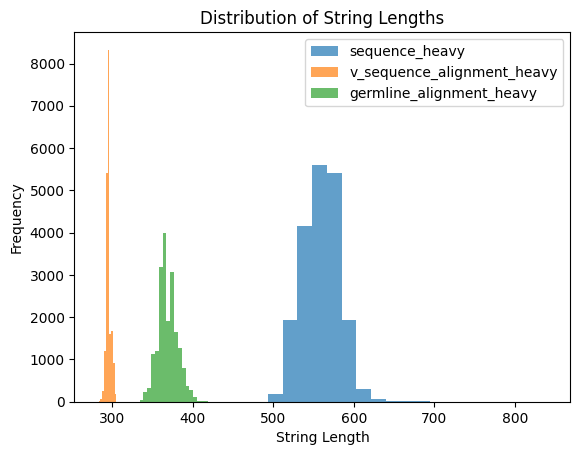

In [33]:
OAS_wrapper.plot_string_length_distribution(data_unit_file, ["sequence_heavy", "v_sequence_alignment_heavy", "germline_alignment_heavy"])


The Variable, Diversity and Junction (VDJ) regions of a particular sequence are annotated with the identifier that is obtained from IMGT reference database (as shown below).

In [35]:
sequences[["v_call_heavy", "d_call_heavy", "j_call_heavy"]]

,v_call_heavy,d_call_heavy,j_call_heavy
0,IGHV4-61*02,IGHD3-9*01,IGHJ3*02
1,IGHV3-23*01,IGHD3-3*01,IGHJ3*02
2,IGHV1-3*01,IGHD2-21*02,IGHJ5*02
3,IGHV3-15*01,IGHD3-10*01,IGHJ4*02
4,IGHV3-23*04,IGHD5-12*01,IGHJ5*02
...,...,...,...
19622,IGHV1-3*01,IGHD6-13*01,IGHJ3*02
19623,IGHV1-24*01,IGHD3-10*01,IGHJ6*03
19624,IGHV3-30*18,IGHD2-2*01,IGHJ4*02
19625,IGHV3-15*01,IGHD3-3*01,IGHJ6*02


If a user is interested to map the identifier to the actual sequences, below script can be used:

In [37]:
# Retrieve the original sequences first
v_sequences_db_path = "../refs/imgt_human_IGHV_sequences.txt"
d_sequences_db_path = "../refs/imgt_human_IGHD_sequences.txt"
j_sequences_db_path = "../refs/imgt_human_IGHJ_sequences.txt"

In [50]:
# Assuming you have loaded your DataFrame and sequences DataFrames (df, v_sequences_df, d_sequences_df, j_sequences_df)
query_sequence = 'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG'
df = pd.read_csv(data_unit_file, low_memory=False, skiprows=1)
v_sequences_df = pd.read_csv(v_sequences_db_path, names=("v_call", "sequence"), header=None, sep="\t")
d_sequences_df = pd.read_csv(d_sequences_db_path, names=("d_call", "sequence"), header=None, sep="\t")
j_sequences_df = pd.read_csv(j_sequences_db_path, names=("j_call", "sequence"), header=None, sep="\t")
result = OAS_wrapper.tabulate_query_sequence(query_sequence, df, v_sequences_df, d_sequences_df, j_sequences_df)
print(result)

{'sequence_heavy': 'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG', 'v_call': 'IGHV3-23*01', 'v_sequence': 'gaggtgcagctgttggagtctggggga...ggcttggtacagcctggggggtccctgagactctcctgtgcagcctctggattcaccttt............agcagctatgccatgagctgggtccgccaggctccagggaaggggctggagtgggtctcagctattagtggtagt......ggtggtagcacatactacgcagactccgtgaag...ggccggttcaccatctccagagacaattccaagaacacgctgtatctgcaaatgaacagcctgagagccgaggacacggccgtatattactgtgcgaaaga', 'd_call': 'IGHD3-3*01', '